# **BUSINESS UNDERSTANDING**
\
The business wishes to venture into a new field, they have choosen the aviation sector as they next venture. The company's main focus is however to operate for commercial and private enterprises. The fact that the company is expanding to now this new field means that they have no prior knowledge of the aircraft sector. This means that they are faced with the problem of determining what type of aircraft to purchase and the potential risks associated with it i.e damage.
Due to this shortcomings the business is faced with the problem of making a decision. The goal of my analysis is so that I can Identify the different categories of aircrafts especially the ones that are associated with the lowest risks of accidents. This analysis will help the business to make informed decision as they venture into aviation field.

# **DATA UNDERSTANDING**
The dataset used for the analysis is from National Transportation Safety Board and it was downloaded from [kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses?resource=download). The data is from the years 1962 to 2023. The key data points from the dataset are for example;


*   "Aircraft.damage" - In aircraft damage it describes the extent to which the aircraft in question was damaged. Either completely destroyed , substantial or minor.


*   "Aircraft.Category" - Aircraft category describes what type of aircraft it was. Maybe an airplane or a helicopter.



*   "Injury.Severity" = This decribes the levels of injuries sustained by the people on board.






# **DATA PREPARATION**

In [416]:
#importing the required libraries
#importing pandas with the standard alias
#numpy for basic computation of numerals
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**Viewing the first five rows of the Aviation Data**

In [417]:
#loading the CSV files into Pandas DataFrames
df = pd.read_csv('AviationData.csv',encoding='latin1')
df.head()

C:\Users\sam\AppData\Local\Temp\ipykernel_32264\737321279.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv',encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [418]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [419]:
#Identify the type of data in question and the number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The dataset consists of 88,889 rows of data pertaining each aircraft that has been involved in any type of accident

In [420]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [421]:
#checking for null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

# ***DATA PREPARATION***

# ***DROPPING COLUMNS***
In my analysis the dataset contained alot of columns which are very useful, however for my analysis some columns will not be vital for my analysis so I decided to drop them and focus on those which highly influence my findings.

In [422]:
df = df[[#'Event.Id',
         'Investigation.Type',
         #'Accident.Number',
         'Event.Date',
      # 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
     #  'Airport.Name',
         'Injury.Severity', 'Aircraft.damage',
      # 'Aircraft.Category',
         #'Registration.Number',
         'Make', 'Model',
       #'Amateur.Built',
         'Number.of.Engines','Broad.phase.of.flight', 'Purpose.of.flight',
         #'Engine.Type', 'FAR.Description',
       #'Schedule', 'Air.carrier',
         'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
      # 'Weather.Condition', 'Report.Status',
      # 'Publication.Date'
         ]]

# ***DEALING WITH MISSING VALUES***

*   For the numerical columns null values were filled zero. This is because there are missing maybe because at that particular year there were zero injuries. Filling it with the mean or median could possibly alter our outcome.



In [423]:

#replacing null values with zero
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0)

df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna(df['Broad.phase.of.flight'].mode()[0])

# ***DROPPING ROWS***
In my dataset there are columns with missing values in the row columns, this rows could not affect our outcome hence it is easier to drop them rather than filling them

In [424]:
#dropping rows with missing values
df[df[['Make','Model','Injury.Severity','Aircraft.damage','Number.of.Engines','Purpose.of.flight']].isna().any(axis=1)]
df.dropna(subset=['Make','Model','Injury.Severity','Aircraft.damage','Number.of.Engines', 'Purpose.of.flight'],inplace=True)

In [425]:
#format make to uppercase
df['Make'] = df['Make'].str.upper().str.strip()

# ***CHECKING TO SEE IF OUR DATA IS CLEAN***

In [426]:
df.isna().sum()

Investigation.Type        0
Event.Date                0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Broad.phase.of.flight     0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64

# ***CHECKING FOR OUTLIERS***
Now that the data is clean it is now time to check for any outliers in our dataset. The reason for looking for outliers after the cleaning is because a column with many missing values can give a misleading IQR.

In [427]:

# Selecting numerical columns
cols = df.select_dtypes(include='number')

# Looping through the numerical column
for col in cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} has {outliers.shape[0]} outliers")

Number.of.Engines has 10142 outliers
Total.Fatal.Injuries has 14977 outliers
Total.Serious.Injuries has 11163 outliers
Total.Minor.Injuries has 13791 outliers
Total.Uninjured has 1595 outliers


Our Numerical columns seem to contain many outliers , however my decision was on keeping them because they depict real scenarios. This scenarios are however rare but are extremely important in aircraft selection and also help in safety analysis.

In [428]:
#checking for duplicates
df.duplicated().value_counts()

False    78119
True       104
Name: count, dtype: int64

In [429]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [430]:
# Saving the cleaned data to a new CSV file
df.to_csv('C:\\Users\\sam\\Desktop\\clean_AviationData.csv', index=False)

In [431]:
df

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Broad.phase.of.flight,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Accident,1948-10-24,Fatal(2),Destroyed,STINSON,108-3,1.0,Cruise,Personal,2.0,0.0,0.0,0.0
1,Accident,1962-07-19,Fatal(4),Destroyed,PIPER,PA24-180,1.0,Unknown,Personal,4.0,0.0,0.0,0.0
2,Accident,1974-08-30,Fatal(3),Destroyed,CESSNA,172M,1.0,Cruise,Personal,3.0,0.0,0.0,0.0
3,Accident,1977-06-19,Fatal(2),Destroyed,ROCKWELL,112,1.0,Cruise,Personal,2.0,0.0,0.0,0.0
6,Accident,1981-08-01,Fatal(4),Destroyed,CESSNA,180,1.0,Unknown,Personal,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88865,Accident,2022-12-12,Non-Fatal,Substantial,CESSNA,172,1.0,Landing,Instructional,0.0,0.0,0.0,1.0
88867,Accident,2022-12-12,Minor,Substantial,AIRBUS HELICOPTERS,EC 130 T2,1.0,Landing,Business,0.0,1.0,0.0,0.0
88873,Accident,2022-12-14,Non-Fatal,Substantial,CIRRUS DESIGN CORP,SR22,1.0,Landing,Personal,0.0,0.0,0.0,1.0
88877,Accident,2022-12-16,Minor,Substantial,CESSNA,R172K,1.0,Landing,Personal,0.0,1.0,0.0,0.0


# ***BAR GRAPH***

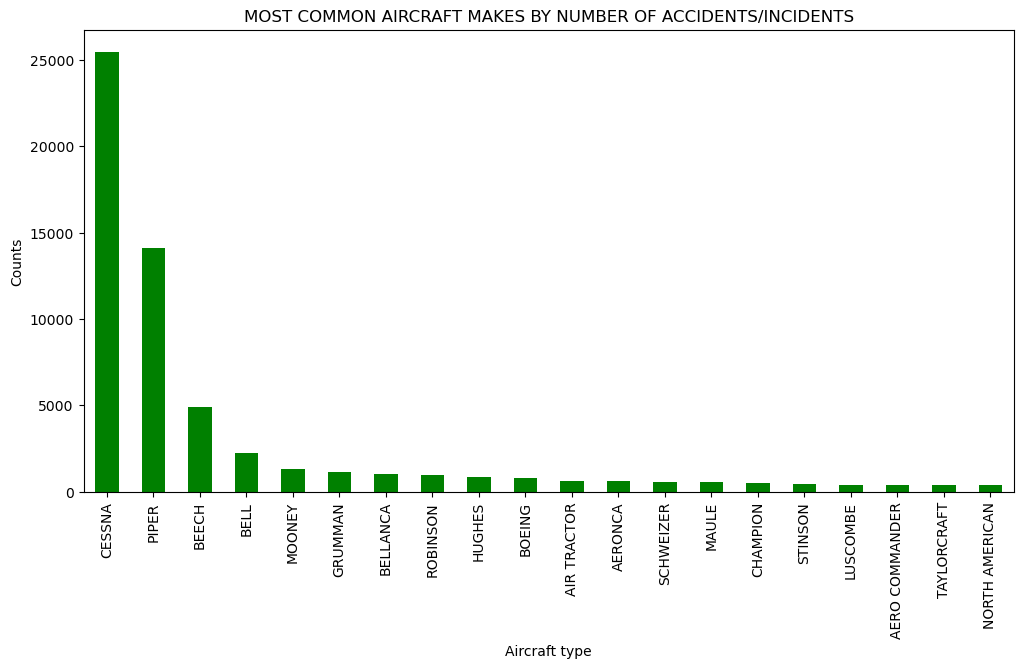

In [432]:
#Grouping the most common aircraft makes
Same_Make_Count = df['Make'].value_counts().reset_index()
Same_Make_Count.columns = ['Make', 'Counts']
#plotting the bar graph
#top 20 most common makes
Same_Make_Count.head(20).plot(kind='bar', x='Make', y='Counts', figsize=(12, 6), legend=False,color='green')
plt.title('MOST COMMON AIRCRAFT MAKES BY NUMBER OF ACCIDENTS/INCIDENTS')
plt.xlabel('Aircraft type')
plt.ylabel('Counts')


plt.show()

The Bar graph above represents the top 10 most common makes of aircraft used throughout years 1963 to 2023



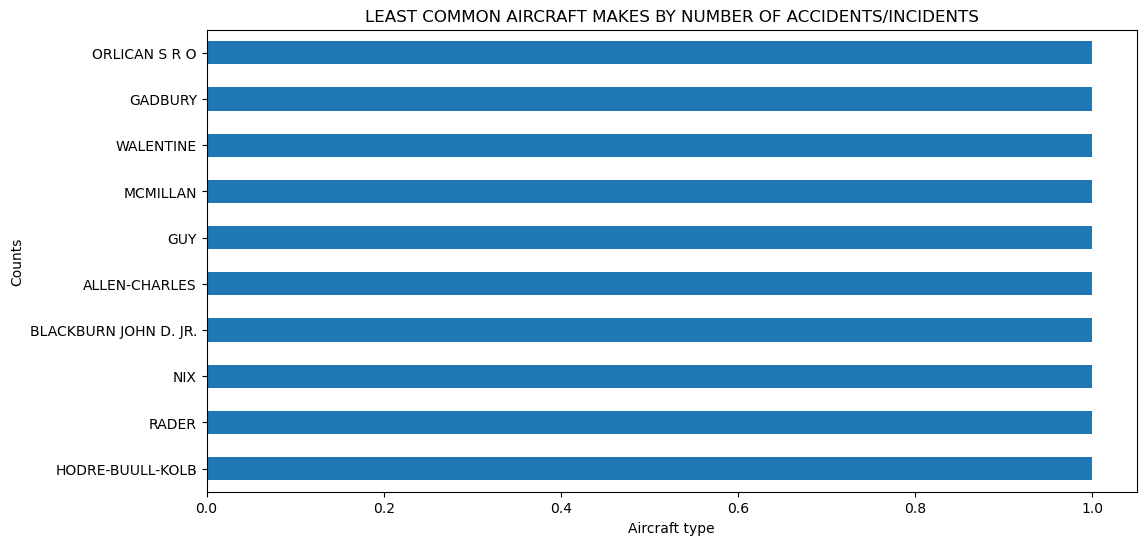

In [433]:
#Grouping aircraft with the lowest  makes
Same_Make_Count = df['Make'].value_counts().reset_index()
Same_Make_Count.columns = ['Make', 'Counts']
#plotting the bar graph
#The least common makes
Same_Make_Count.tail(10).plot(kind='barh', x='Make', y='Counts', figsize=(12, 6), legend=False)
plt.title('LEAST COMMON AIRCRAFT MAKES BY NUMBER OF ACCIDENTS/INCIDENTS')
plt.xlabel('Aircraft type')
plt.ylabel('Counts')


plt.show()

# ***CONVERTING TO DATES***
The date in which the events took place is important in that it helps in narrowing down on the dates the accidents happened. This helps us to know whether the aircraft accidents are increasing, decreasing or the accident have remained stable. This will be crucial in our decision making process.In my dataset I have alot of years which are impossible to fit in one plot so Binning is the best way whereby I grouped the ages in ranges of 10 years. Initially in our dataset the event date column is of type object and to work with it it needs to be datetime hence the conversion.

In [434]:
#converting the Event date column to dates
df['Event_Year'] = pd.to_datetime(df['Event.Date']).dt.year
#Binning
df['Event_by_Year'] = pd.cut(df['Event_Year'],bins=[1960,1970,1980,1990,2000,2010,2020,2023],labels = ['60s','70s','80s','90s','20s','2010s','2020s'])


***Representing the total number of fatal accidents over the years 1963 to 2023 on a line plot***

C:\Users\sam\AppData\Local\Temp\ipykernel_32264\995120231.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouping = df.groupby('Event_by_Year')['Total.Fatal.Injuries'].sum()


Text(0.5, 1.0, 'Total fatal accidents over the years 1963 to 2023 ')

<Figure size 1200x600 with 0 Axes>

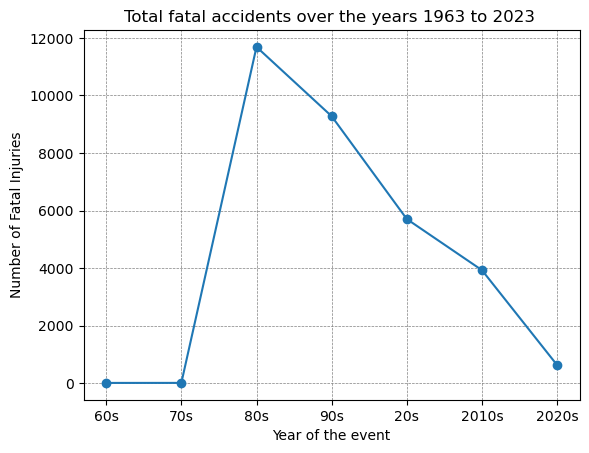

In [435]:
# Create the plot for the total fatal injuries throughout the years
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots()
#groupby function
grouping = df.groupby('Event_by_Year')['Total.Fatal.Injuries'].sum()
ax.plot(grouping.index, grouping.values,marker='o')

# Add labels for x and y axes
ax.set_xlabel('Year of the event')
ax.set_ylabel('Number of Fatal Injuries')
ax.grid(
    True,
    which='both',
    color='gray',
    linestyle='--',
    linewidth=0.5
)
# title
ax.set_title('Total fatal accidents over the years 1963 to 2023 ')


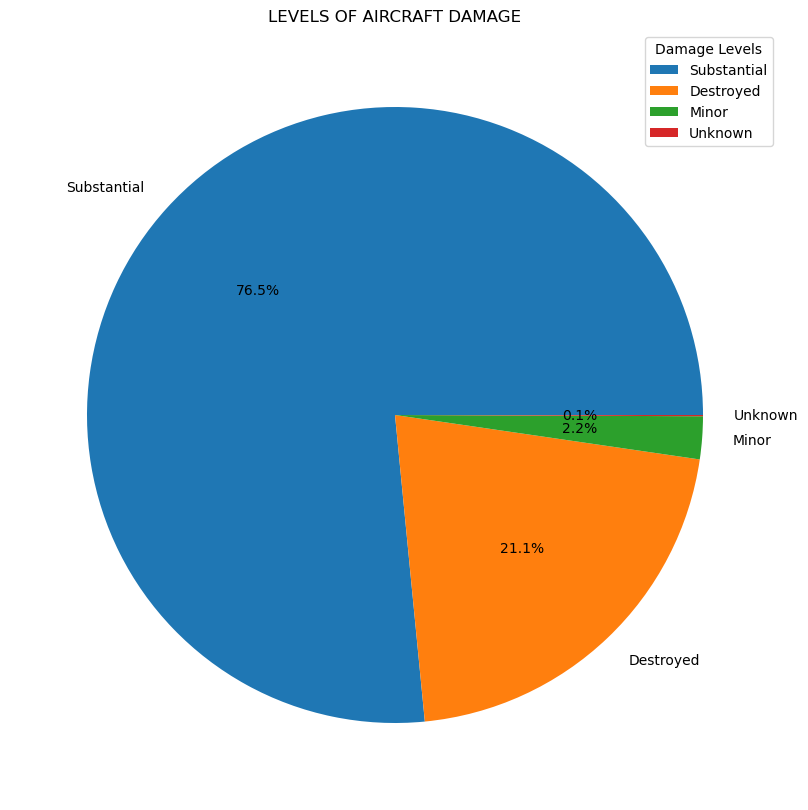

In [436]:
#creating a dataset for DAMAGE
Same_Damage = df['Aircraft.damage'].value_counts().reset_index()
Same_Damage.columns = ['Aircraft.damage','No_of_Damages']

plt.figure(figsize=(10,10))
plt.pie(Same_Damage['No_of_Damages'],labels = Same_Damage['Aircraft.damage'],autopct= '%2.1f%%')
plt.title('LEVELS OF AIRCRAFT DAMAGE')
plt.legend(title='Damage Levels')
plt.show()

In [437]:
#creating a risk rate column based on the totals from the injuries
#some planes had no reported injuries so I decided to add 5,3,1 respectively for plotting purposes
df['Risk_rate'] = (
    (df['Total.Fatal.Injuries']) +
    (df['Total.Serious.Injuries']) +
    (df['Total.Minor.Injuries'])
)
risk = df.groupby(['Make'])['Risk_rate'].sum().reset_index()
risk = risk.sort_values(by='Risk_rate')
risk

,Make,Risk_rate
7210,ZWICKER MURRAY R,0.0
2207,FIGHTER ESCORT WINGS LTD,0.0
5202,QUIST,0.0
5201,QUINN AVIATION INC.,0.0
2210,FINGERHUT REVOLUTION,0.0
...,...,...
597,BELL,2283.0
759,BOEING,3232.0
582,BEECH,5372.0
5019,PIPER,12318.0


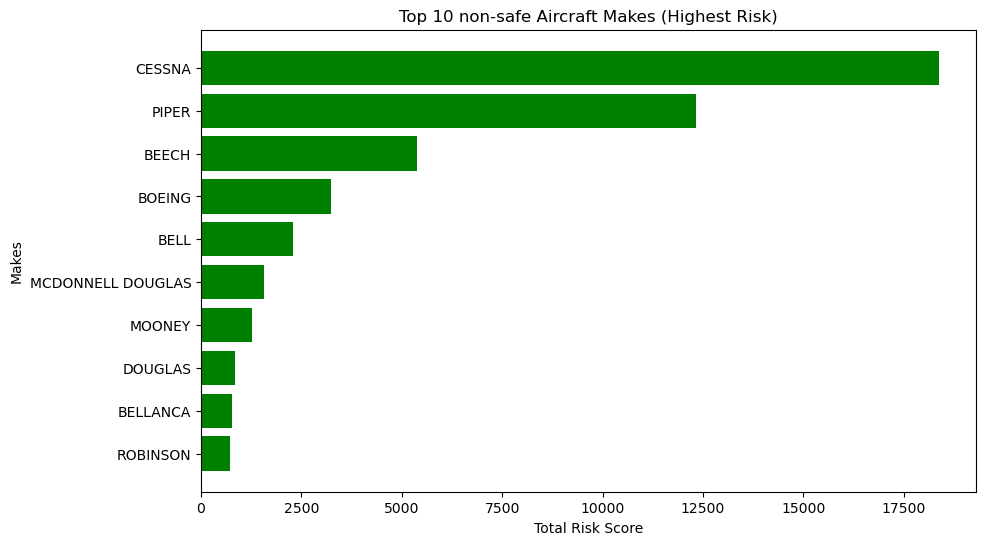

In [438]:
#plotting a bar graph for the top 15 non-safe aircrafts based on the risk rate
least_15_aircrafts = risk.tail(10)

plt.figure(figsize=(10,6))
plt.barh(least_15_aircrafts['Make'], least_15_aircrafts['Risk_rate'],color='green')
plt.xlabel('Total Risk Score')
plt.ylabel('Makes')
plt.title('Top 10 non-safe Aircraft Makes (Highest Risk)')
plt.show()

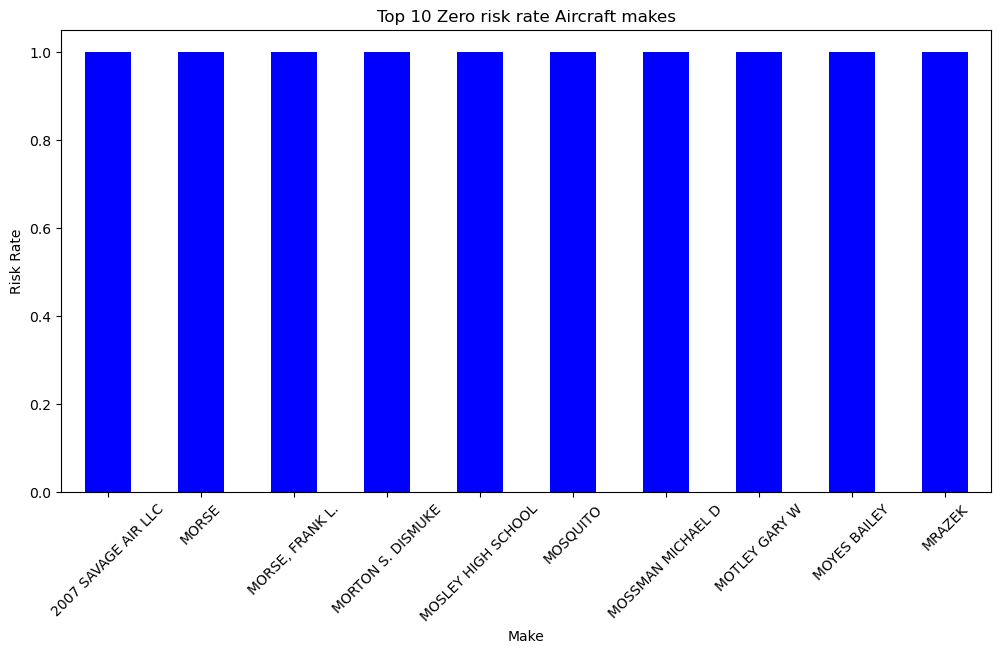

In [439]:
#plotting the top 10 aircreft makes with the lowest risk
top_15_aircrafts = risk.head(10)
plt.figure(figsize=(10, 6))

#plt.plot(top_15_aircrafts['Make'], top_15_aircrafts['Risk_rate'], color='skyblue')
# Assuming you have a column 'Total_Accidents'
safe_makes = df[df['Risk_rate'] == 0].groupby('Make').size().sort_values(ascending=True).head(10)

safe_makes.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Top 10 Zero risk rate Aircraft makes')
plt.ylabel('Risk Rate')
plt.xlabel('Make')
plt.xticks(rotation=45)

plt.show()


In [440]:
#calculating the total number of injuries
df['Total_Injuries'] = (
    (df['Total.Fatal.Injuries']) +
    (df['Total.Serious.Injuries']) +
    (df['Total.Minor.Injuries'])
)

C:\Users\sam\AppData\Local\Temp\ipykernel_32264\918329361.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouping = df.groupby('Event_by_Year')['Total_Injuries'].sum()


Text(0.5, 1.0, 'Total Number of Injuries from 1963 to 2023 ')

<Figure size 1200x600 with 0 Axes>

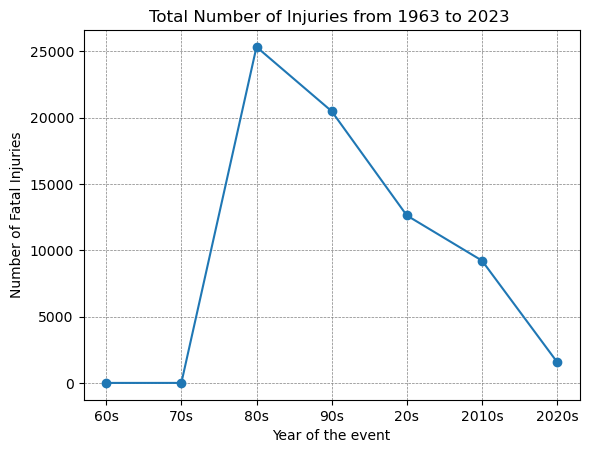

In [441]:
# Create the plot
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots()
#groupby function
grouping = df.groupby('Event_by_Year')['Total_Injuries'].sum()
ax.plot(grouping.index, grouping.values,marker='o')

# Add labels for x and y axes
ax.set_xlabel('Year of the event')
ax.set_ylabel('Number of Fatal Injuries')
ax.grid(
    True,
    which='both',
    color='gray',
    linestyle='--',
    linewidth=0.5
)

# title
ax.set_title('Total Number of Injuries from 1963 to 2023 ')

In [442]:
#Filtered years
filtered_years = df[df['Event_Year'] >=2000]

D_levels = filtered_years.groupby(['Make', 'Aircraft.damage']).size().reset_index(name='counts')
D_levels = D_levels.sort_values(by='counts', ascending=True).tail(10)


#displays top aircraft makes by their damage levels
D_levels


,Make,Aircraft.damage,counts
553,BELLANCA,Substantial,290
515,BEECH,Destroyed,399
3433,MOONEY,Substantial,448
4166,ROBINSON,Substantial,469
3828,PIPER,Destroyed,661
531,BELL,Substantial,674
968,CESSNA,Destroyed,970
517,BEECH,Substantial,1435
3830,PIPER,Substantial,4528
970,CESSNA,Substantial,8054


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


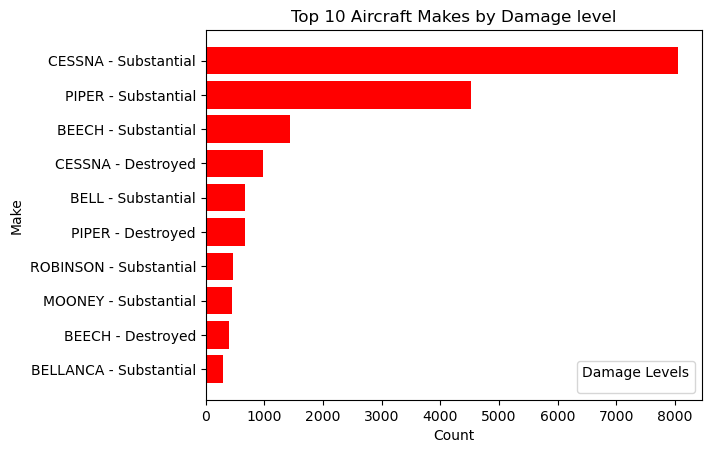

In [443]:
#plotting
#Combining two categorical entries to be on the same axis
plt.barh(D_levels['Make'] + " - " + D_levels['Aircraft.damage'], D_levels['counts'], color='red')
plt.title('Top 10 Aircraft Makes by Damage level')
plt.xlabel('Count')
plt.ylabel('Make')
plt.legend(title='Damage Levels')

plt.show()

In [444]:
accidents_per_year = df['Event_Year'].value_counts().sort_index()

In [445]:
accidents_per_year

Event_Year
1948       1
1962       1
1974       1
1977       1
1981       1
1982    3503
1983    3428
1984    3326
1985    3008
1986    2758
1987    2712
1988    2614
1989    2452
1990    2428
1991    2395
1992    2294
1993    2233
1994    2098
1995    2155
1996    2049
1997    1953
1998    2000
1999    2002
2000    1921
2001    1693
2002    1706
2003    1742
2004    1627
2005    1713
2006    1529
2007    1675
2008    1574
2009    1527
2010    1484
2011    1524
2012    1533
2013    1220
2014    1162
2015    1187
2016    1232
2017    1196
2018    1203
2019    1094
2020     929
2021    1075
2022    1160
Name: count, dtype: int64

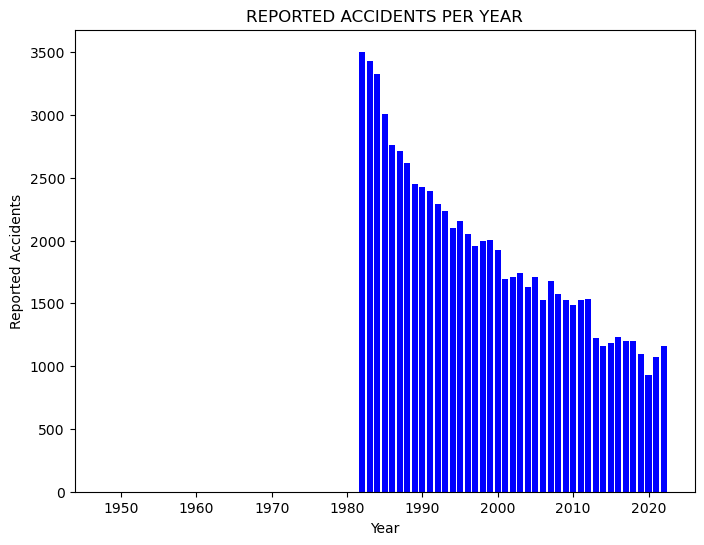

In [446]:
plt.figure(figsize=(8, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values, color='blue')
plt.xlabel('Year')
plt.ylabel('Reported Accidents')
plt.title('REPORTED ACCIDENTS PER YEAR')

plt.show()

In [447]:
filtered_years2 = df[df['Event_Year'] >=2000]
D_levels2 = filtered_years2.groupby(['Make', 'Event_Year']).size().reset_index(name='counts')
D_levels2 = D_levels2.sort_values(by='counts', ascending=True).head(15)

In [448]:
D_levels2

,Make,Event_Year,counts
0,107.5 FLYING CORPORATION,2006,1
5204,MILLER,2000,1
5203,MILHOLLAND,2016,1
5202,MILESKI,2009,1
5201,MIKOYAN MIG,2004,1
5200,MIKOYAN GUREVICH,2013,1
5199,MIKOYAN GUREVICH,2012,1
5198,MIKOYAN GUREVICH,2002,1
5197,MIKOYAN,2003,1
5196,MIKE SMILEE,2006,1


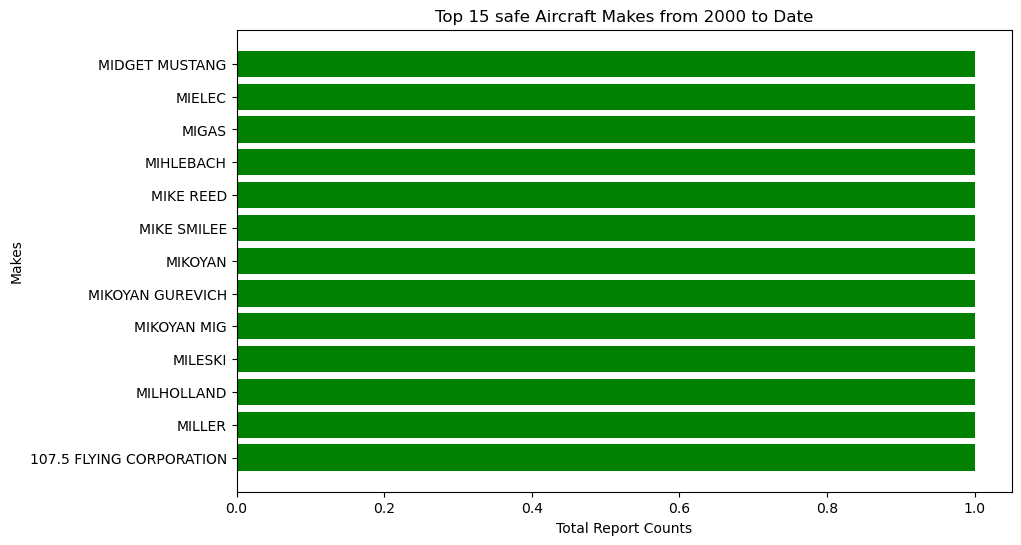

In [449]:
#plotting
plt.figure(figsize=(10,6))
plt.barh(D_levels2['Make'], D_levels2['counts'],color='green')
plt.xlabel('Total Report Counts')
plt.ylabel('Makes')
plt.title('Top 15 safe Aircraft Makes from 2000 to Date')
plt.show()